In [30]:
# Imports
from prophet import Prophet
import pandas as pd
from pathlib import Path


In [31]:
# Load Bitcoin Price Data
bitcoin_df = pd.read_csv(Path('../resources/BTC-USD.csv'))
bitcoin_df = bitcoin_df[['Date', 'Open']]
bitcoin_df = bitcoin_df.rename(columns={'Date':'ds', 'Open':'y'})
bitcoin_df['ds'] = pd.to_datetime(bitcoin_df['ds'])

bitcoin_df

,ds,y
0,2021-10-04,48208.90625
1,2021-10-05,49174.96094
2,2021-10-06,51486.66406
3,2021-10-07,55338.62500
4,2021-10-08,53802.14453
...,...,...
177,2022-03-30,47456.89844
178,2022-03-31,47062.14844
179,2022-04-01,45554.16406
180,2022-04-02,46285.50000


In [32]:
# Create Train Data
train_df = bitcoin_df[(bitcoin_df['ds'] <= '2022-02-08')]

# Create Test Data and format for Results DataFrame
test_df = bitcoin_df[(bitcoin_df['ds'] > '2022-02-08')]
test_df = test_df.set_index('ds')
test_df.shape

(54, 1)

In [33]:
test_df.head()

,y
ds,
2022-02-09,44096.70313
2022-02-10,44347.80078
2022-02-11,43571.12891
2022-02-12,42412.30078
2022-02-13,42236.56641


In [34]:
# Instantiate Prophet and fit training model
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=54) # There are 54 rows in the test data
prediction = m.predict(future)
results = prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
formatted_results = results.set_index('ds')
formatted_results = pd.concat([formatted_results, test_df], axis=1, join="inner")
formatted_results = formatted_results.rename(columns={'yhat':'Prediction', 'yhat_lower':'Lower Boundary', 'yhat_upper':'Upper Boundary', 'y':'Actual'})
formatted_results.head()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.2921
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       325.394     0.0011232       86.5745      0.2254       0.991      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110        325.66   0.000671341        64.313   8.603e-06       0.001      194  LS failed, Hessian reset 
     175       325.965   0.000731894       77.2026   1.334e-05       0.001      321  LS failed, Hessian reset 
     199       326.004    2.6616e-05       87.6541      0.6482     0.06482      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       326.287    0.00759012       73.5479           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       326.545   3.69226e-07       59.1532   4.645e-09       0.001      667  LS failed, Hessian reset

,Prediction,Lower Boundary,Upper Boundary,Actual
ds,,,,
2022-02-09,36616.639764,33467.960722,39664.545287,44096.70313
2022-02-10,36403.769187,33499.816613,39518.158334,44347.80078
2022-02-11,35705.899390,32549.987315,39270.602912,43571.12891
2022-02-12,35255.088395,32032.373551,38306.262855,42412.30078
2022-02-13,35295.259264,32128.651158,38619.449179,42236.56641


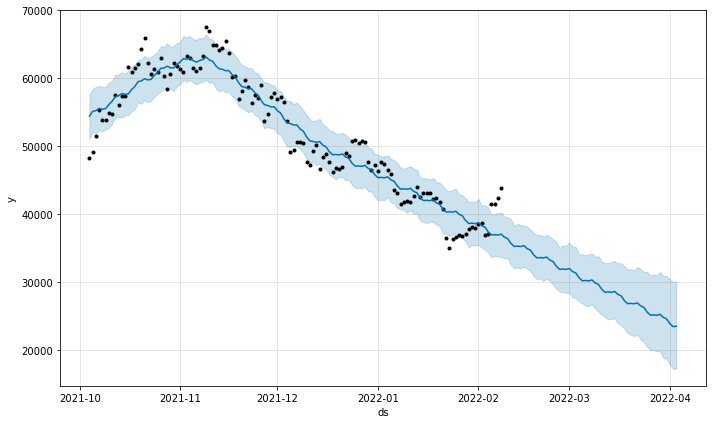

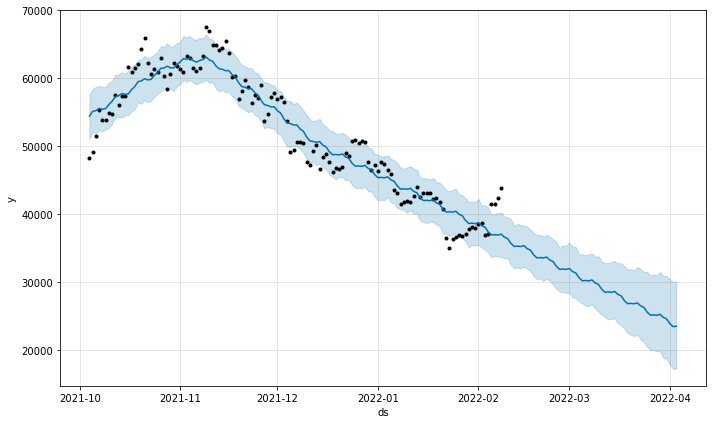

In [36]:
# Plot Results
m.plot(results)

